## Задача коммивояжера (Решение с помощью алгоритма муравьиной колонии)

In [1]:
import matplotlib.pyplot as plt
import time
import random
import pandas as pd
import networkx as nx

In [14]:
alpha = 1.5          # Параметр, определяющий степень важности феромонов
beta = 2           # Параметр, определяющий степень важности длины ребер
ro = 0.09         # Коэффицент испарения феромона
ph = 1             # Начальное значение феромона на ребрах
N = 500            # Количество итераций, циклов жизни муравьев.
Coord = [(500,500),(1000,2500),(2465,1779),(2000,250),(1200,1400)] # Координаты городов для графа G

In [3]:
# Создание вершин графа. Функция создает случайные точки (x,y)

def create_nodes(count):
    coord = [(random.randint(0,100), random.randint(0,100)) for i in range(count)]
    return coord


# Функция создания матрицы смежности, в случае, когда даны координаты городов(неорентированный полный граф)

def create_m(l):
    matrix = [[] for i in range(len(l))]
    for i in range(len(l)):
        node = l[i]
        for j in l:
            matrix[i]+=[round(((j[0]-node[0])**2+(j[1]-node[1])**2)**(1/2), 1)]
    return matrix

In [4]:
# Создание случайной матрицы смежности(ориентированный полный граф)

def random_m(count):
    G = [[random.randint(1,50) for i in range(count)] for j in range(count)]
    for i in range(Node):
        G[i][i] = 0
    return G

In [17]:
# Создание графа по координатам
G1 = create_m(Coord)
for i in G1:
    print(i)

[0.0, 2061.6, 2344.6, 1520.7, 1140.2]
[2061.6, 0.0, 1632.8, 2462.2, 1118.0]
[2344.6, 1632.8, 0.0, 1598.1, 1320.6]
[1520.7, 2462.2, 1598.1, 0.0, 1400.9]
[1140.2, 1118.0, 1320.6, 1400.9, 0.0]


In [18]:
df = pd.DataFrame(G1) 
df.to_excel(r'/Users/danildzitiev/Desktop/test.xlsx', index=True) # Запись графа в файл Excel

In [6]:
# Функция создает словарь ребер по матрице смежности. 
# Номер ребра - ключ, [начало, конец, длина, значение феромона] - значение

def edges(G):
    k = []
    path_cur = []
    for j in range(len(G)):
        path_cur += G[j] # Делаем список с расстояниями для j-ого города
        k += [[j, i + len(G[0]) - len(path_cur), path_cur[i], 1] for i in range(len(path_cur)) if path_cur[i] != 0] 
        # Строка выше добавляет ребра в виде списка [начало, конец, длина, значение феромона = 1]
        path_cur = []
    return {i:k[i] for i in range(len(k))}

In [7]:
# Класс муравей.
class Ant():
    def __init__(self, cur_city):
        self.cur_city = cur_city      # Текущий город
        self.path = [self.cur_city]   # Пройденные города
        self.length = 0               # Пройденное расстояние
    def move(self):
        Q = sum([i[2]*i[3] for i in S.values()])
        v_p = [[(1/S[i][2]**beta)*(S[i][3]**alpha)/Q, i] for i in S if ((S[i][0] == self.cur_city) and (S[i][1] not in self.path))]
        if len(v_p) > 0:
            res = max(v_p)
            self.length += S[res[1]][2]
            for i in S:
                S[i][3] = (1-ro)*S[i][3]
            S[res[1]][3] += 1/S[res[1]][2]  
            self.cur_city = S[res[1]][1]
            self.path += [self.cur_city]
            return res
        if self.path[-1]!=self.path[0]:
            self.path.append(self.path[0])
            for i in S.values():
                if i[0] == self.cur_city and i[1] == self.path[0]:
                    self.length += i[2]
        return self.path[0]

In [8]:
# Функция обхода для одного муравья
def exp(ant,G): 
    for i in range(len(G)):
        ant.move()

# Создание муравьев        
def generate_ants(G, count): # Указаное количество
    nodes = [x for x in range(count)]
    ants = [Ant(nodes.pop(random.randint(0,len(nodes)-1))) for i in range(count)]
    return ants

def generate_ants_all(G): # По муравью на каждую вершину
    ants = [Ant(i) for i in range(len(G))]
    return ants

def search(l,G):
    for i in l:
        exp(i,G)

def draw(Nodes, path): # Рисование маршрута.
    x = [Nodes[i][0] for i in path]
    y = [Nodes[i][1] for i in path]
    plt.plot(x,y, mfc = 'red', ms = 12, marker = 'o')
    plt.show()

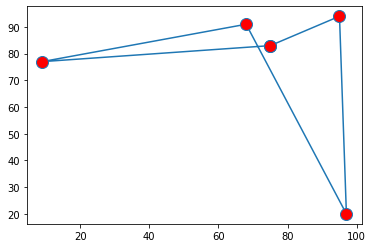

7009.8
[0, 4, 1, 2, 3, 0]
--- 1.5865111351013184 seconds ---


In [16]:
start_time = time.time()

Graph = create_nodes(8)
m = create_m(Coord)
S = edges(m)
for i in range(N):
    a = generate_ants_all(m)
    search(a, m)
    

draw(Graph, a[0].path)

print(a[0].length)
print(a[0].path)

print(f"--- {(time.time() - start_time)} seconds ---")

In [11]:


def draw_with_nx(start, end, edges_dict):
    p = [(end[i], end[i+1]) for i in range(len(end)-1)]
    
    coordinates = dict() # Координаты вершин
    for x in end:
        coordinates[x] = start[x]
    
    label = dict() # Подпись весов ребер
    
    for i in p:
        for j in edges_dict.values():
            if i ==(j[0],j[1]): # Заполняем словарь, в котором ключ - (начало, конец), а значение - (вес ребра)
                label[i] = j[2]

    G = [] # Сами ребра для графа
    for j in label:
        G.append((j[0], j[1], label[j]))

    Graph = nx.Graph()
    Graph.add_weighted_edges_from(G)
    fig, ax = plt.subplots(figsize=(20, 10))


    nx.draw_networkx_edge_labels(Graph, 
                                 pos = coordinates, 
                                 edge_labels=label, 
                                 label_pos=0.5, 
                                 font_size=15, 
                                 font_color='k')


    nx.draw(Graph, 
            node_color = 'yellow', 
            edge_color = 'b', 
            with_labels = True, 
            pos = coordinates, 
            node_size = 700, 
            ax = ax,  
            width = 2, 
            font_size = 12)

233.89999999999998
[0, 4, 6, 5, 7, 3, 2, 1, 0]


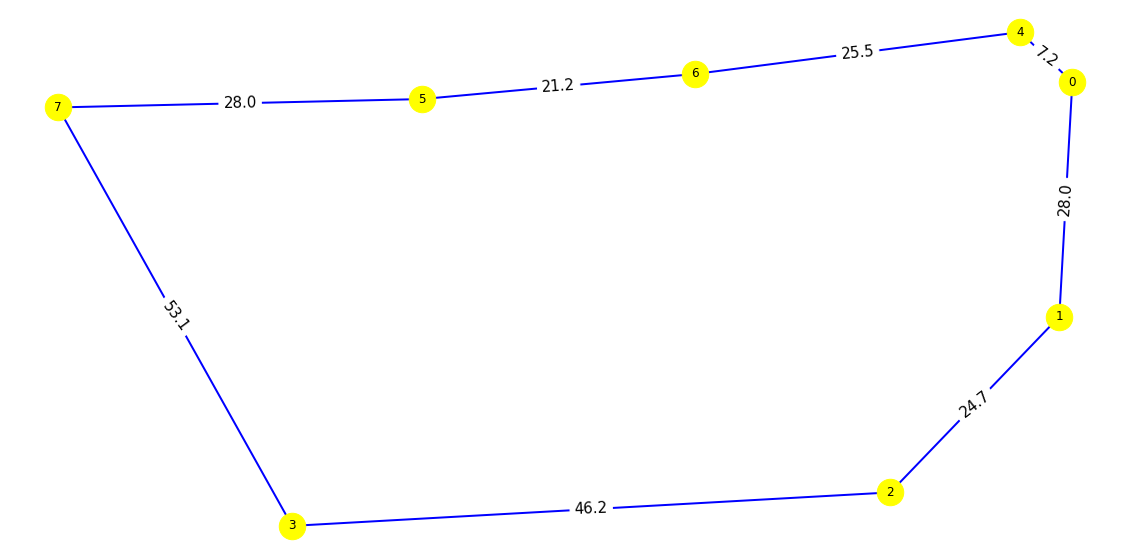

In [12]:
draw_with_nx(Graph, a[0].path, S)
print(a[0].length)
print(a[0].path)